Para mu = 0.5:
Punto de equilibrio: 0, Clasificación: Estable
Punto de equilibrio: 1.0, Clasificación: Estable


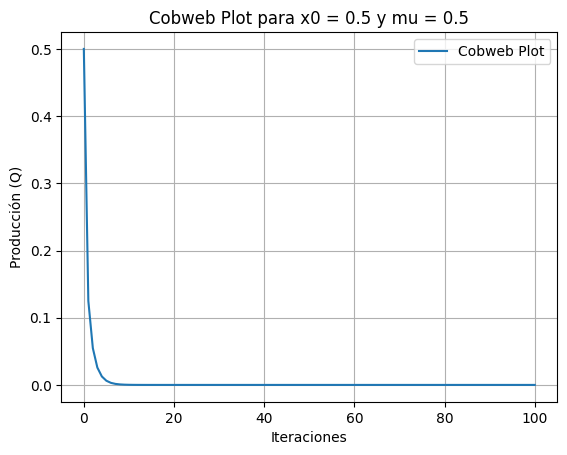

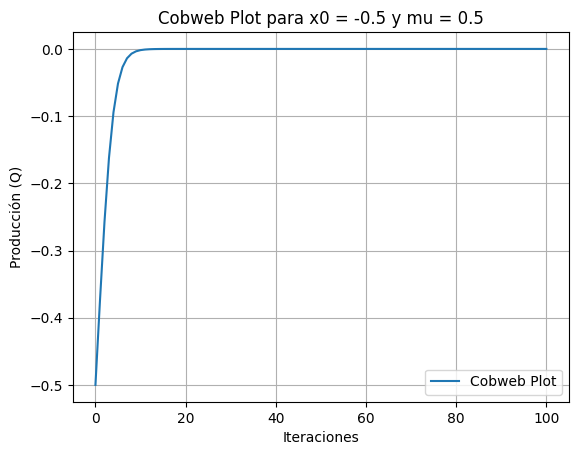

C:\Users\matia\AppData\Local\Temp\ipykernel_23480\500473666.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, x, 'k--', label='$y = x$', color='gray')


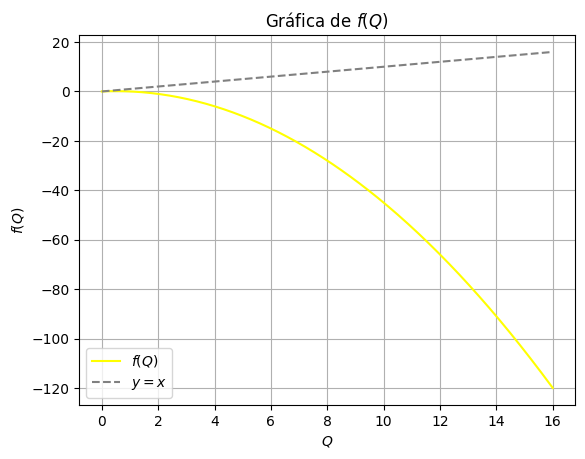

C:\Users\matia\AppData\Local\Temp\ipykernel_23480\500473666.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, x, 'k--', label='$y = x$', color='gray')


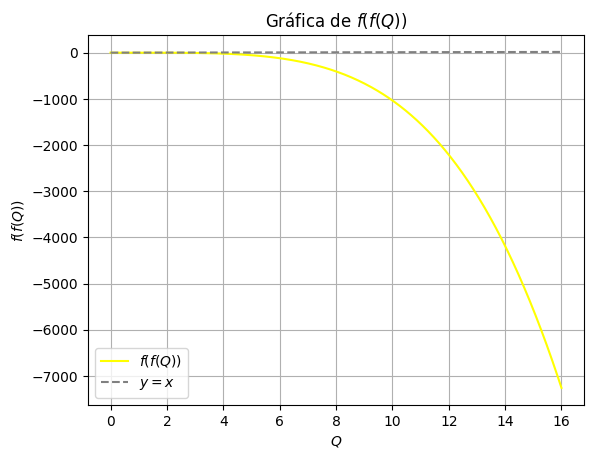

Para mu = 1.0:
Punto de equilibrio: 0, Clasificación: Inestable
Punto de equilibrio: 2.0, Clasificación: Inestable


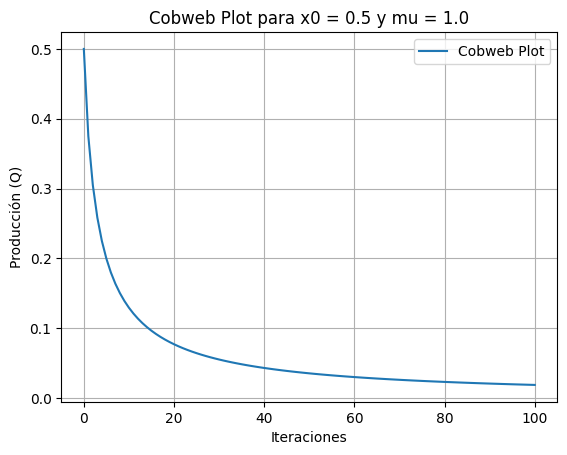

OverflowError: (34, 'Result too large')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función del sistema dinámico
def sistema_dinamico(x, mu):
    return mu * x - 0.5 * x**2

# Definimos la derivada del sistema
def derivada_sistema(x, mu):
    return mu - x

# Puntos de equilibrio
def puntos_equilibrio(mu):
    return [0, 2 * mu]

# Clasificación de los equilibrios
def clasificar_equilibrio(mu):
    eq0 = derivada_sistema(0, mu)
    eq1 = derivada_sistema(2 * mu, mu)
    
    clasificacion0 = 'Estable' if abs(eq0) < 1 else 'Inestable'
    clasificacion1 = 'Estable' if abs(eq1) < 1 else 'Inestable'
    
    return [(0, clasificacion0), (2 * mu, clasificacion1)]

# Cobweb plot para estudiar la dinámica
def cobweb_plot(f, x0, mu, n_iter=100):
    x = [x0]
    for _ in range(n_iter):
        x.append(f(x[-1], mu))
    return x

# Graficar la función y su iteración
def graficar_funcion(mu):
    x = np.linspace(0, 16, 400)
    y = sistema_dinamico(x, mu)
    y_iter = sistema_dinamico(y, mu)
    
    plt.figure()
    plt.plot(x, y, label='$f(Q)$', color='yellow')
    plt.plot(x, x, 'k--', label='$y = x$', color='gray')
    plt.xlabel('$Q$')
    plt.ylabel('$f(Q)$')
    plt.title('Gráfica de $f(Q)$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure()
    plt.plot(x, y_iter, label='$f(f(Q))$', color='yellow')
    plt.plot(x, x, 'k--', label='$y = x$', color='gray')
    plt.xlabel('$Q$')
    plt.ylabel('$f(f(Q))$')
    plt.title('Gráfica de $f(f(Q))$')
    plt.legend()
    plt.grid(True)
    plt.show()

mu_values = [0.5, 1.0, 1.5]
x0_values = [0.5, -0.5]

# Ejecución del script
if __name__ == "__main__":
    for mu in mu_values:
        print(f"Para mu = {mu}:")
        equilibrios = puntos_equilibrio(mu)
        clasificacion = clasificar_equilibrio(mu)
        for eq, clase in clasificacion:
            print(f"Punto de equilibrio: {eq}, Clasificación: {clase}")
        
        for x0 in x0_values:
            x_vals = cobweb_plot(sistema_dinamico, x0, mu)
            plt.figure()
            plt.plot(range(len(x_vals)), x_vals, label='Cobweb Plot')
            plt.xlabel('Iteraciones')
            plt.ylabel('Producción (Q)')
            plt.title(f'Cobweb Plot para x0 = {x0} y mu = {mu}')
            plt.legend()
            plt.grid(True)
            plt.show()
        
        graficar_funcion(mu)
